In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
import math

In [2]:
file_path = '/content/drive/MyDrive/ML_projects_data/heart_disease_data.csv'
data = pd.read_csv(file_path)

In [3]:
print(data.head())
print(data.describe())
print(data.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  12

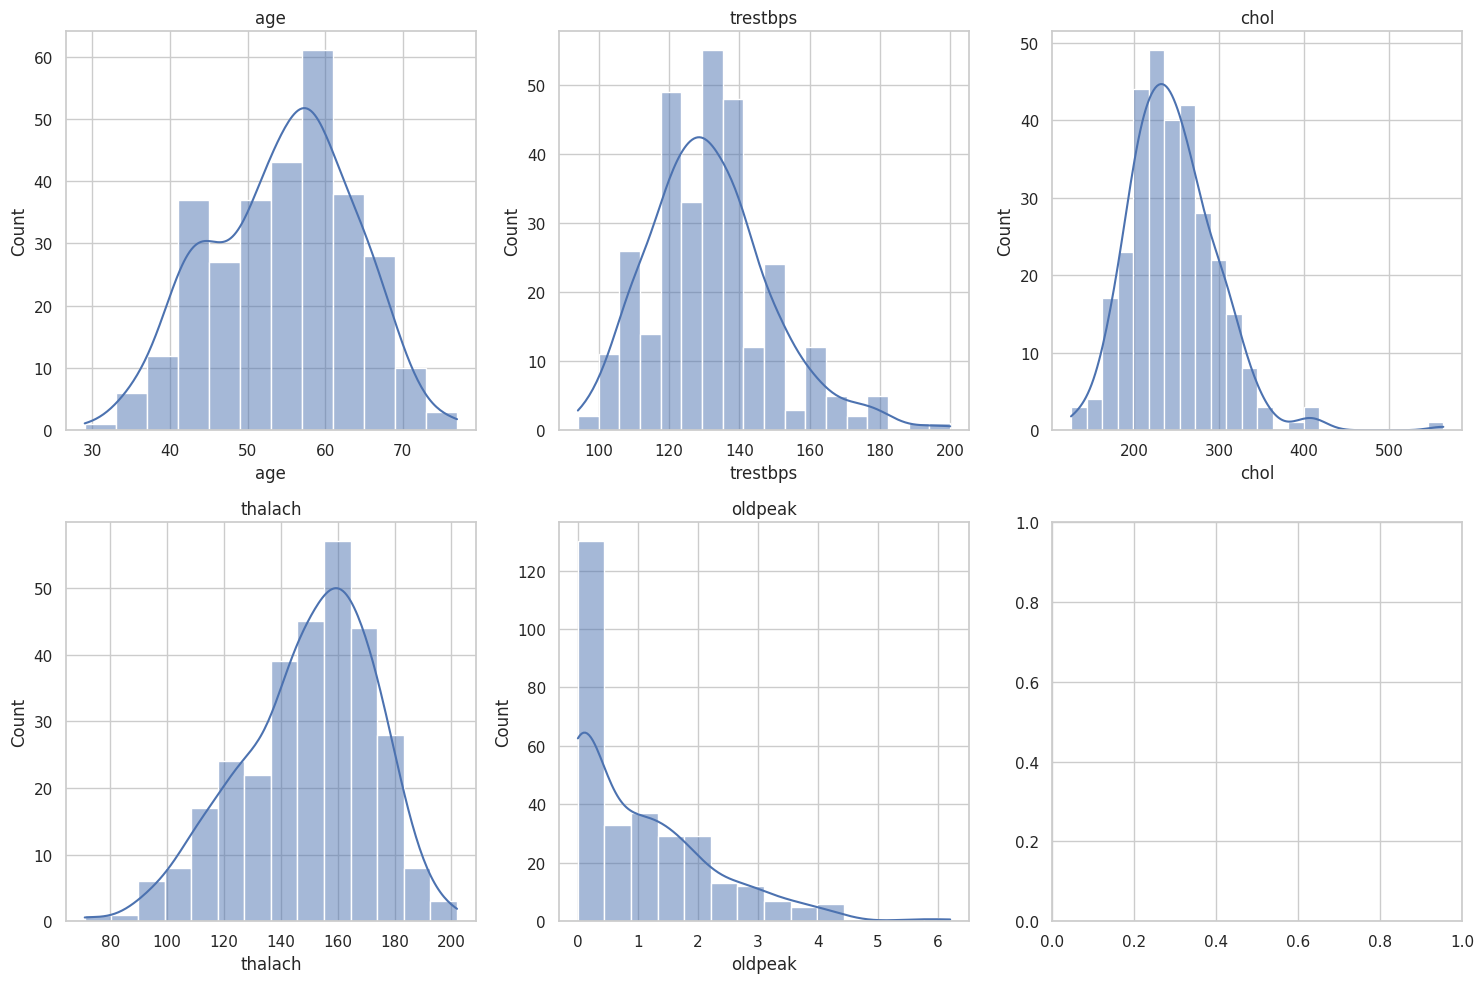

In [4]:
sns.set(style="whitegrid")
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, ax in enumerate(axs.flat):
    if i < len(numerical_features):  # Avoid index error
        sns.histplot(data[numerical_features[i]], kde=True, ax=ax)
        ax.set_title(numerical_features[i])
        ax.set_ylabel('Count')
plt.tight_layout()

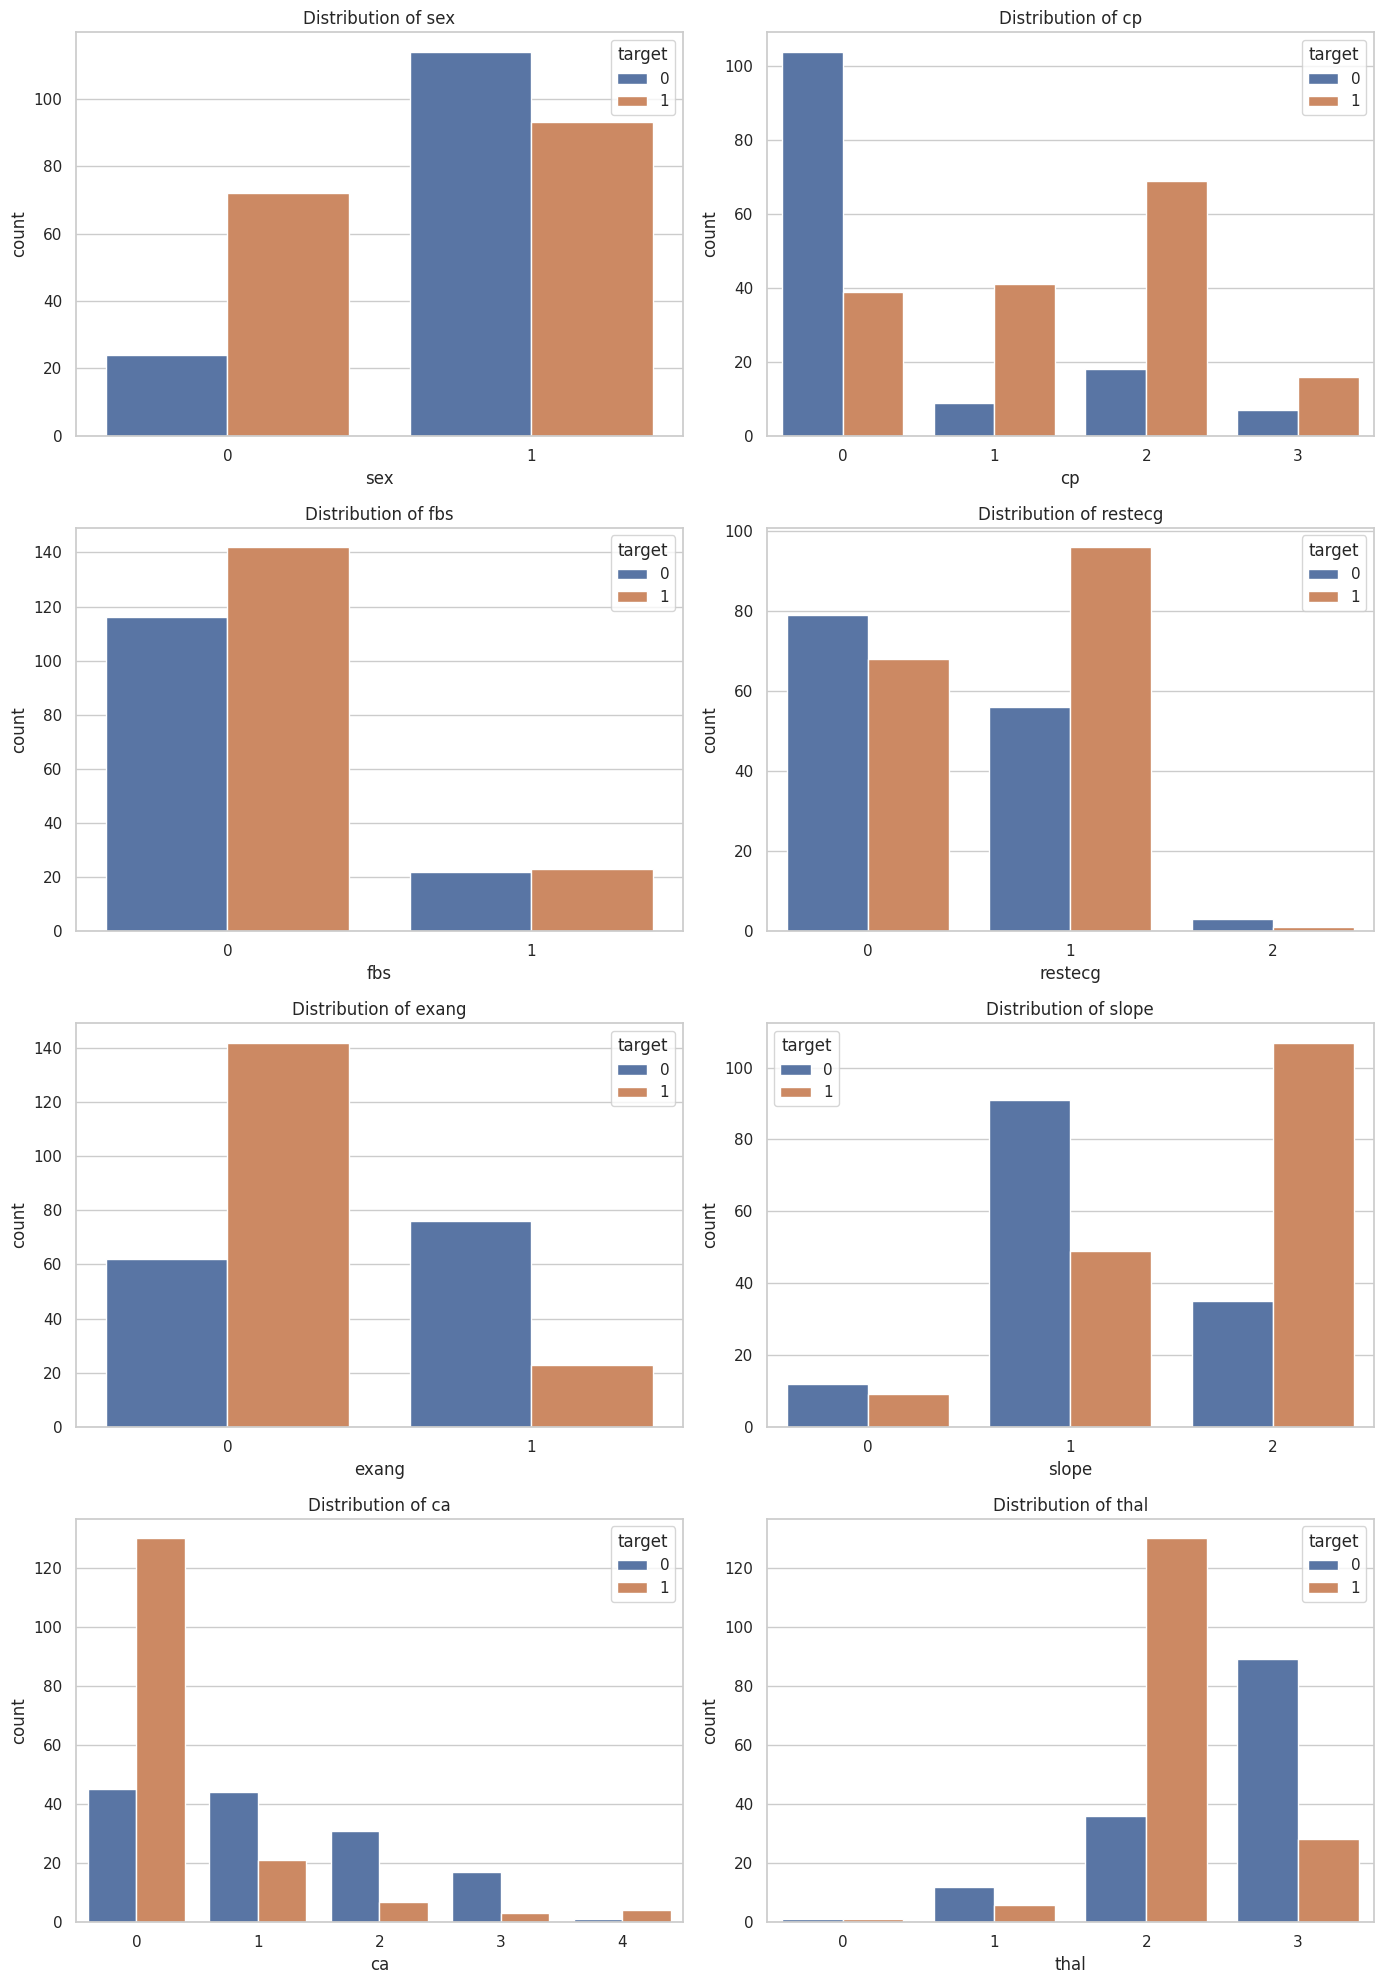

In [5]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
fig, axs = plt.subplots(4, 2, figsize=(14, 20))
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='target', data=data, ax=axs[i // 2, i % 2])
    axs[i // 2, i % 2].set_title(f"Distribution of {feature}")
plt.tight_layout()

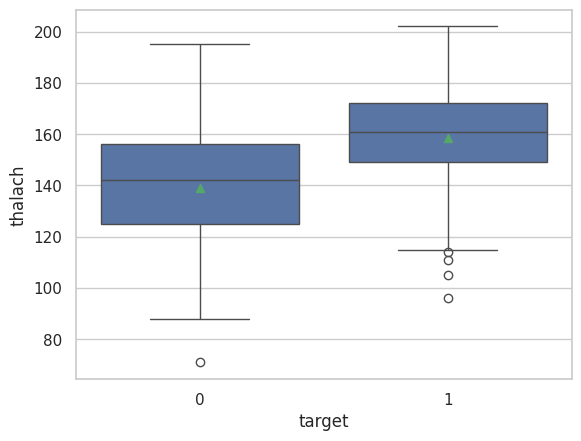

In [6]:

sns.boxplot(x="target", y="thalach", showmeans=True, data=data)
plt.show()


In [7]:
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [8]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [9]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
data['target'].value_counts()


target
1    165
0    138
Name: count, dtype: int64

In [11]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

In [12]:
results = []
for name, model in models.items():
    pipeline = make_pipeline(preprocessor, model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    Auc = roc_auc_score(y_test, y_pred)
    results.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'AUC':Auc})

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.885246,0.903226,0.87500,0.888889,0.885776
1,Decision Tree,0.819672,0.862069,0.78125,0.819672,0.821659
2,Random Forest,0.868852,0.875000,0.87500,0.875000,0.868534
3,SVM,0.901639,0.933333,0.87500,0.903226,0.903017
4,KNN,0.885246,0.903226,0.87500,0.888889,0.885776


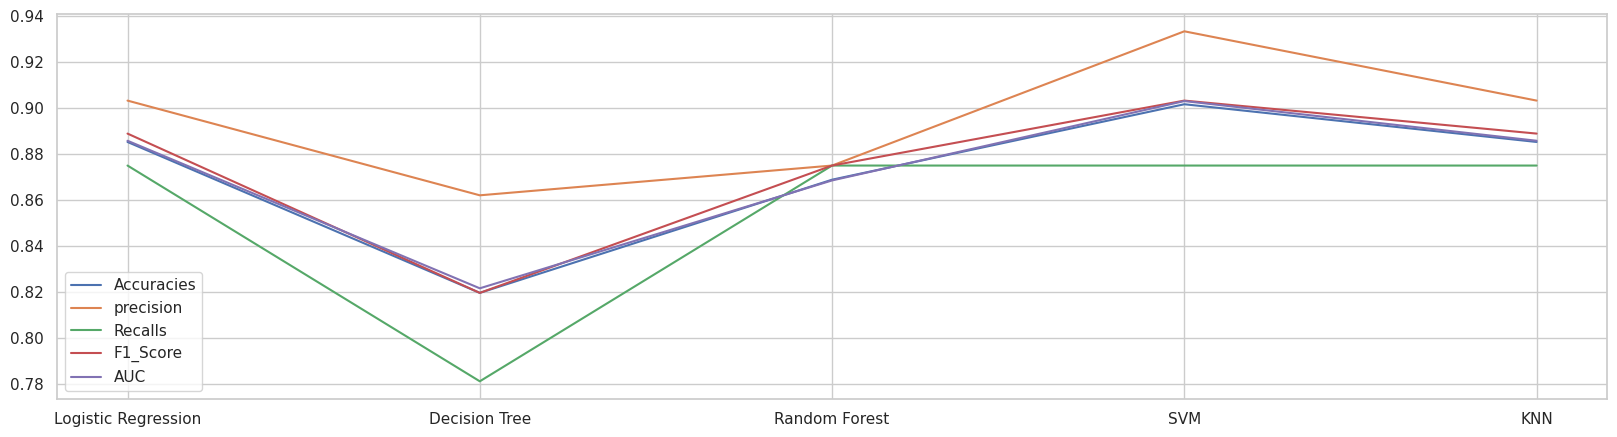

In [13]:
fig,ax = plt.subplots(figsize=(20,5))

plt.plot(results_df.Model,results_df.Accuracy,label='Accuracies')
plt.plot(results_df.Model,results_df.Precision,label='precision')

plt.plot(results_df.Model,results_df.Recall,label='Recalls')
plt.plot(results_df.Model,results_df['F1 Score'],label='F1_Score')
plt.plot(results_df.Model,results_df.AUC,label='AUC')

plt.legend()
plt.show()

In [14]:

data_corr = data.corr()
data_corr


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696



**we see that the variables "cp (chest pain type) " , "thalach (maximum heart rate achieved) "**

**exang (exercise induced angina) and oldpeak (ST depression induced by exercise) have strong negative correlations (-0.44 and -0.43, respectively) with the target**

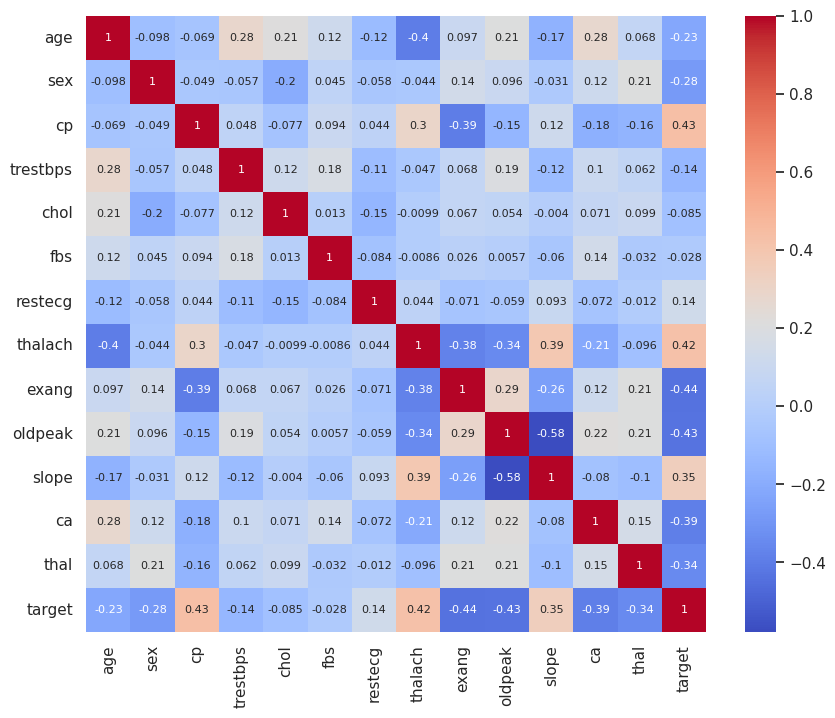

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True,annot_kws={"size": 8}, cmap='coolwarm')
plt.show()

In [16]:
import pickle

In [17]:
Svm_model=models['SVM'].fit(X_train,y_train)

In [18]:
filename = 'svm_model.sav'
with open(filename, 'wb') as file:
    pickle.dump(Svm_model, file)

# Code to download the file in Colab
from google.colab import files
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [20]:
tree_model=DecisionTreeClassifier(min_impurity_decrease=0.009,max_depth=4)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.009)

In [21]:
from sklearn import tree


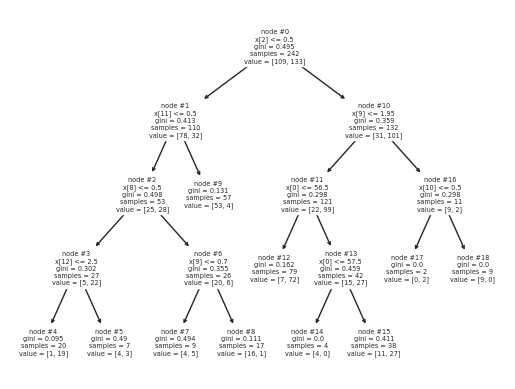

<Figure size 4000x2000 with 0 Axes>

In [22]:
tree.plot_tree(tree_model,node_ids=True)
plt.figure(figsize=(20, 10), dpi=200)

plt.show()